In [92]:
import numpy as np
import pandas as pd

In [93]:
# Load and Clean
df = pd.read_csv("/content/titanic.csv")
df = df.drop(["PassengerId", "Name", "Ticket","Cabin",], axis=1)
df = df.dropna(how='all')

In [94]:
# Split features/target
X = df.drop(["Survived"], axis=1)
y = df["Survived"]

In [103]:
# Preprocessing: handle categorical + numerical
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_features = ['Sex', 'Embarked']
num_features = ["Pclass", "SibSp", "Parch", "Fare", "Age"]

# Pipelines for each type
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first"))])

num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())])

preprocessor = ColumnTransformer(transformers=[
    ("cat", cat_transformer, cat_features),
    ("num", num_transformer, num_features)])

In [96]:
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [97]:
# Train Model: #LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred_logreg = logreg.predict(X_test)

In [98]:
# Metrices
lr_acc_score = accuracy_score(y_test, y_pred_logreg)
lr_f1_score = f1_score(y_test, y_pred_logreg)
lr_con_matrix = confusion_matrix(y_test, y_pred_logreg)

# Print
print(f"ROC AUC SCORE: {roc_auc_score(y_test,logreg.predict_proba(X_test)[:, 1])}")
print(f"Accuracy Score: {lr_acc_score}")
print(f"F1 Score [Test]: {lr_f1_score}")
print("**-**"*8)
print(f"Confusion Matrix")
print(lr_con_matrix)
print("**-**"*8)
print(classification_report(y_test, y_pred_logreg))

ROC AUC SCORE: 0.8826254826254826
Accuracy Score: 0.8100558659217877
F1 Score [Test]: 0.7638888888888888
**-****-****-****-****-****-****-****-**
Confusion Matrix
[[90 15]
 [19 55]]
**-****-****-****-****-****-****-****-**
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [99]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree.predict(X_test)

# Metrices
tree_acc_score = accuracy_score(y_test, y_pred_tree)
tree_f1_score = f1_score(y_test, y_pred_tree)
tree_con_matrix = confusion_matrix(y_test, y_pred_tree)

# Print
print(f"ROC AUC SCORE: {roc_auc_score(y_test,tree.predict_proba(X_test)[:, 1])}")
print(f"Accuracy Score: {tree_acc_score}")
print(f"F1 Score [Test]: {tree_f1_score}")
print("**-**"*8)
print(f"Confusion Matrix")
print(tree_con_matrix)
print("**-**"*8)
print(classification_report(y_test, y_pred_tree))

ROC AUC SCORE: 0.8463320463320464
Accuracy Score: 0.7988826815642458
F1 Score [Test]: 0.7391304347826086
**-****-****-****-****-****-****-****-**
Confusion Matrix
[[92 13]
 [23 51]]
**-****-****-****-****-****-****-****-**
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [100]:
model_ev = pd.DataFrame({"Model": ["Logistic Regression", "Decision Tree"],
                        "Accuracy Score":[lr_acc_score, tree_acc_score],
                        "F1 Score":[lr_f1_score, tree_f1_score],
                          "ROC-AUC Score":[roc_auc_score(y_test,y_pred_logreg), roc_auc_score(y_test, y_pred_tree)]})
model_ev

,Model,Accuracy Score,F1 Score,ROC-AUC Score
0,Logistic Regression,0.810056,0.763889,0.800193
1,Decision Tree,0.798883,0.739130,0.782690


In [101]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])

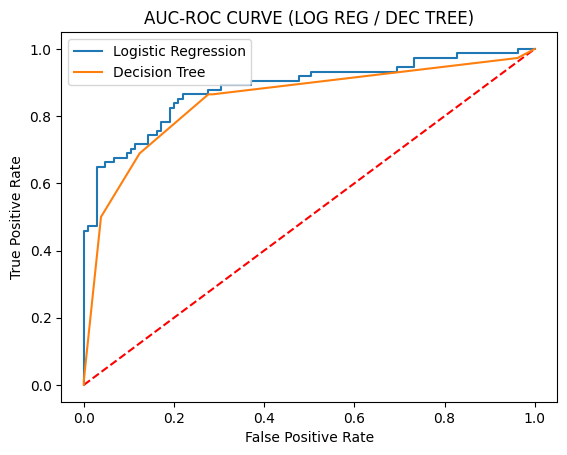

In [102]:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_tree, tpr_tree, label='Decision Tree')

plt.title("AUC-ROC CURVE (LOG REG / DEC TREE)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='best')